In [1]:
# find spark
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
spark = SparkSession.builder.appName("Iteration_4_BDAS").getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/10 07:35:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# read csvs and merge them
import functools
# explicit function
def unionAll(dfs):
    return functools.reduce(lambda df1, df2: df1.union(df2.select(df1.columns)), dfs)
## reading csv with spark
df1 = spark.read.csv('train.csv', inferSchema= True, header=True)
df2 = spark.read.csv('test.csv', inferSchema= True, header=True)
df = unionAll([df2,df1])
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- educational-num: integer (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- capital-gain: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- native-country: string (nullable = true)



In [3]:
# show data
df.show()

+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+
|age|       workclass|fnlwgt|   education|educational-num|    marital-status|       occupation| relationship|              race|gender|capital-gain|capital-loss|hours-per-week|native-country|
+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+
| 39|Self-emp-not-inc|327120|     HS-grad|              9|Married-civ-spouse|     Craft-repair|      Husband|             White|  Male|           0|           0|            40|      Portugal|
| 32|         Private|123253|  Assoc-acdm|             12|Married-civ-spouse|     Craft-repair|      Husband|             White|  Male|           0|           0|            42| United-States|
| 47|         Private|232628|     HS-gra

In [4]:
# show the 
df.describe().show()

+-------+------------------+-----------+------------------+------------+------------------+--------------+----------------+------------+------------------+------+-----------------+-----------------+------------------+--------------+
|summary|               age|  workclass|            fnlwgt|   education|   educational-num|marital-status|      occupation|relationship|              race|gender|     capital-gain|     capital-loss|    hours-per-week|native-country|
+-------+------------------+-----------+------------------+------------+------------------+--------------+----------------+------------+------------------+------+-----------------+-----------------+------------------+--------------+
|  count|             44856|      42358|             44856|       44856|             44856|         44856|           42350|       44856|             44856| 44856|            44856|            44856|             44856|         44093|
|   mean| 38.61632780453005|       null| 189762.7322766185|        n

In [5]:
#show data columns
df.columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [6]:
df = df.drop('capital-gain')
df = df.drop('capital-loss')

In [7]:
#show data columns
df.columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'hours-per-week',
 'native-country']

In [8]:
df.show()

+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+--------------+--------------+
|age|       workclass|fnlwgt|   education|educational-num|    marital-status|       occupation| relationship|              race|gender|hours-per-week|native-country|
+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+--------------+--------------+
| 39|Self-emp-not-inc|327120|     HS-grad|              9|Married-civ-spouse|     Craft-repair|      Husband|             White|  Male|            40|      Portugal|
| 32|         Private|123253|  Assoc-acdm|             12|Married-civ-spouse|     Craft-repair|      Husband|             White|  Male|            42| United-States|
| 47|         Private|232628|     HS-grad|              9|Married-civ-spouse|     Craft-repair|      Husband|             Black|  Male|            40| United-States|
| 19

In [9]:
# import some basic dependencies
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

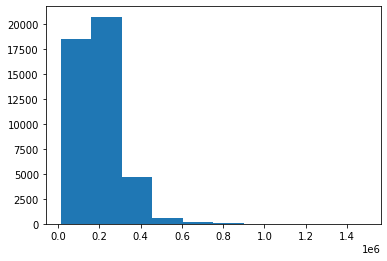

In [10]:
# generate the histogram of fnlwgt
fnlwgt_arr = np.array(df.select('fnlwgt').collect())
plt.hist(fnlwgt_arr)
plt.show()

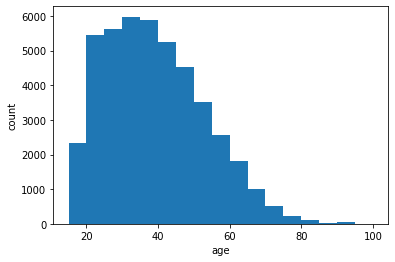

In [11]:
# generate the histogram of age
ageArr = np.array(df.select('age').collect())
age_bins = [15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
age_hist = plt.hist(ageArr, bins = age_bins)
age_hist = plt.ylabel("count")
age_hist = plt.xlabel("age")
plt.show()

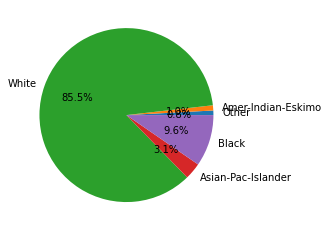

In [12]:
# generate the pie chart of gender
race = np.array(df.select("race").groupBy("race").count().collect())
plt.pie(race[:,1], labels = race[:,0], autopct='%1.1f%%')
plt.show()

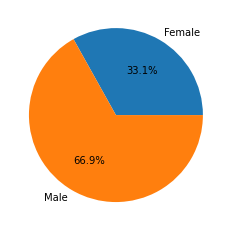

In [13]:
# generate the pie chart of gender
gender = np.array(df.select("gender").groupBy("gender").count().collect())
plt.pie(gender[:,1], labels = gender[:,0], autopct='%1.1f%%')
plt.show()

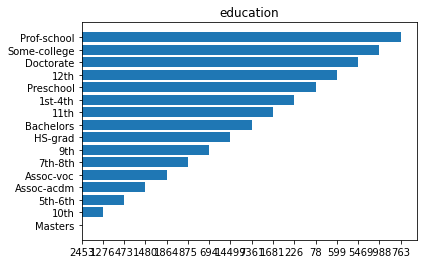

In [14]:
# generate the bar chart of education
education = np.array(df.select("education").groupBy("education").count().collect())
plt.barh(education[:,0],education[:,1])
plt.title('education')
plt.show()

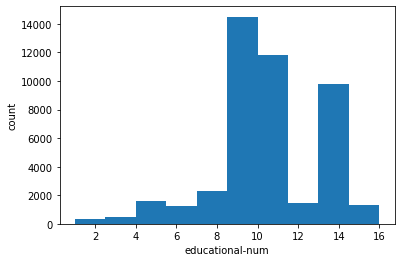

In [15]:
# generate the histogram of educational-num
educational_num = np.array(df.select("educational-num").collect())
plt.hist(educational_num)
plt.ylabel("count")
plt.xlabel("educational-num")
plt.show()

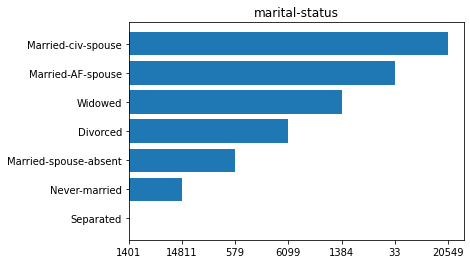

In [16]:
# generate the bar chart of marital-status 
marital_status = np.array(df.select("marital-status").groupBy("marital-status").count().collect())
plt.barh(marital_status[:,0],marital_status[:,1])
plt.title('marital-status')
plt.show()

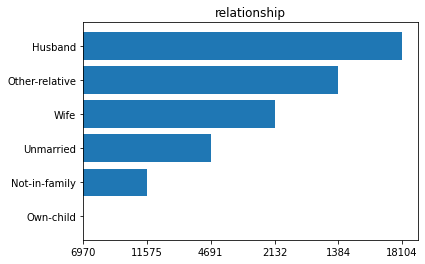

In [17]:
# generate the bar chart of relationship
relationship = np.array(df.select("relationship").groupBy("relationship").count().collect())
plt.barh(relationship[:,0],relationship[:,1])
plt.title('relationship')
plt.show()

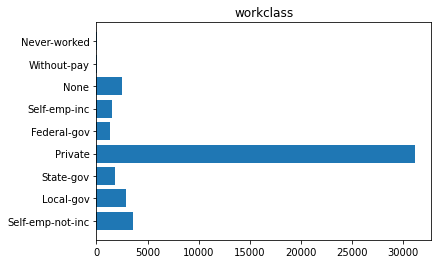

In [18]:
# generate the bar chart of workclass
workclass = np.array(df.select("workclass").groupBy("workclass").count().collect())
workclass[workclass == None] = "None"
plt.barh(workclass[:,0],workclass[:,1])
plt.title('workclass')
plt.show()

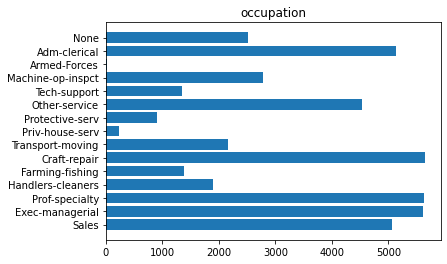

In [19]:
# generate the bar chart of occupation
occupation = np.array(df.select("occupation").groupBy("occupation").count().collect())
occupation[occupation == None] = "None"
plt.barh(occupation[:,0],occupation[:,1])
plt.title('occupation')
plt.show()

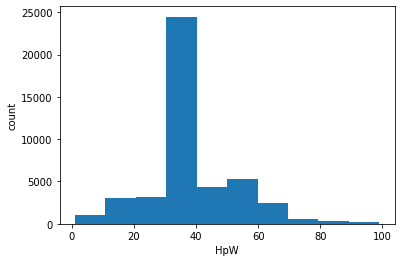

In [20]:
# generate the histogram of hours-per-week
hours_per_week = np.array(df.select("hours-per-week").collect())
plt.hist(hours_per_week)
plt.ylabel("count")
plt.xlabel("HpW")
plt.show()

In [21]:
# show size of data
size = [df.count(),len(df.columns)]
size

[44856, 12]

In [22]:
df_clean = df
df_clean = df_clean.drop('native-country')

In [23]:
# show None size
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

+---+---------+------+---------+---------------+--------------+----------+------------+----+------+--------------+--------------+
|age|workclass|fnlwgt|education|educational-num|marital-status|occupation|relationship|race|gender|hours-per-week|native-country|
+---+---------+------+---------+---------------+--------------+----------+------------+----+------+--------------+--------------+
|  0|     2498|     0|        0|              0|             0|      2506|           0|   0|     0|             0|           763|
+---+---------+------+---------+---------------+--------------+----------+------------+----+------+--------------+--------------+



In [24]:
df_clean = df_clean.na.drop("any")

In [25]:
# show None size
from pyspark.sql.functions import col,isnan, when, count
df_clean.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_clean.columns]
   ).show()

+---+---------+------+---------+---------------+--------------+----------+------------+----+------+--------------+
|age|workclass|fnlwgt|education|educational-num|marital-status|occupation|relationship|race|gender|hours-per-week|
+---+---------+------+---------+---------------+--------------+----------+------------+----+------+--------------+
|  0|        0|     0|        0|              0|             0|         0|           0|   0|     0|             0|
+---+---------+------+---------+---------------+--------------+----------+------------+----+------+--------------+



In [26]:
# show size of data
size = [df_clean.count(),len(df_clean.columns)]
size

[42350, 11]

In [27]:
# new Function Object_to_Num()
# transform string into int, in order to make graph
from pyspark.sql.functions import regexp_replace 
def Object_to_Num(itemName, df_num):
    tempdf = df_num
    items = np.array(tempdf.select(itemName).groupBy(itemName).count().collect())
    i = 0
    tempdf = tempdf.withColumn(itemName + "_num", col(itemName))
    for item in items[:,0]:
        i += 1
        tempdf = tempdf.withColumn(itemName + "_num", regexp_replace(itemName + "_num", item, str(i)))
    return tempdf

df_num = df_clean
#Make a loop for transforming different features
for i in ['workclass', 'education', 'marital-status', 'occupation', "relationship", "race", "gender"]:
    df_num = Object_to_Num(i, df_num)

In [28]:
df_num.show()

+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+--------------+-------------+-------------+------------------+--------------+----------------+--------+----------+
|age|       workclass|fnlwgt|   education|educational-num|    marital-status|       occupation| relationship|              race|gender|hours-per-week|workclass_num|education_num|marital-status_num|occupation_num|relationship_num|race_num|gender_num|
+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+--------------+-------------+-------------+------------------+--------------+----------------+--------+----------+
| 39|Self-emp-not-inc|327120|     HS-grad|              9|Married-civ-spouse|     Craft-repair|      Husband|             White|  Male|            40|            1|            8|                 7|             6|               6|       3|         2|


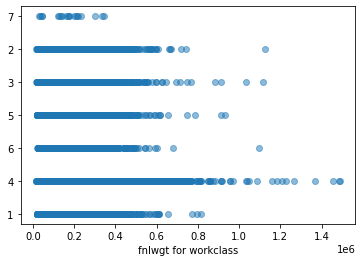

In [29]:
# show density maps between fnlwgt and workclass
plt.xlabel('fnlwgt for workclass')
fnlwgt_num = np.array(df_num.select("fnlwgt").collect())
workclass_num = np.array(df_num.select("workclass_num").collect())
plt.scatter(x=fnlwgt_num[:,0], y=workclass_num[:,0], alpha=0.5)
plt.show()

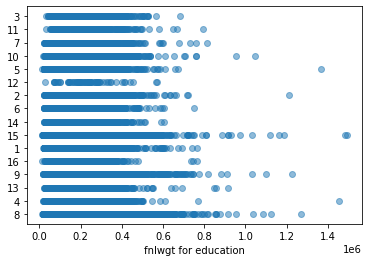

In [30]:
# show density maps between fnlwgt and education
plt.xlabel('fnlwgt for education')
fnlwgt_num = np.array(df_num.select("fnlwgt").collect())
education_num = np.array(df_num.select("education_num").collect())
plt.scatter(x=fnlwgt_num[:,0], y=education_num[:,0], alpha=0.5)
plt.show()

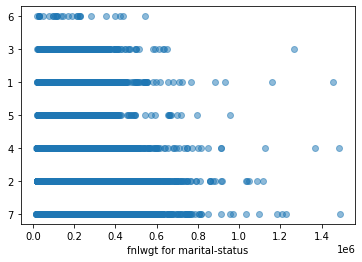

In [31]:
# show density maps between fnlwgt and marital-status
plt.xlabel('fnlwgt for marital-status')
fnlwgt_num = np.array(df_num.select("fnlwgt").collect())
marital_status_num = np.array(df_num.select("marital-status_num").collect())
plt.scatter(x=fnlwgt_num[:,0], y=marital_status_num[:,0], alpha=0.5)
plt.show()

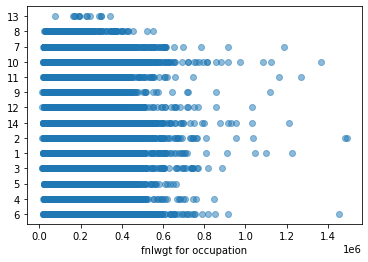

In [32]:
# show density maps between fnlwgt and occupation
plt.xlabel('fnlwgt for occupation')
fnlwgt_num = np.array(df_num.select("fnlwgt").collect())
occupation_num = np.array(df_num.select("occupation_num").collect())
plt.scatter(x=fnlwgt_num[:,0], y=occupation_num[:,0], alpha=0.5)
plt.show()

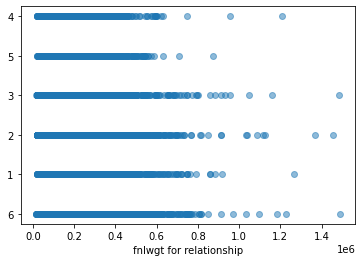

In [33]:
# show density maps between fnlwgt and relationship
plt.xlabel('fnlwgt for relationship')
fnlwgt_num = np.array(df_num.select("fnlwgt").collect())
relationship_num = np.array(df_num.select("relationship_num").collect())
plt.scatter(x=fnlwgt_num[:,0], y=relationship_num[:,0], alpha=0.5)
plt.show()

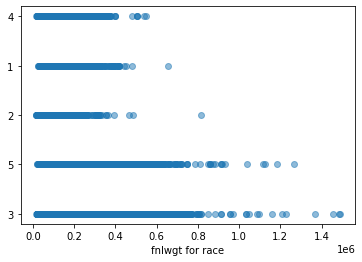

In [34]:
# show density maps between fnlwgt and race
plt.xlabel('fnlwgt for race')
fnlwgt_num = np.array(df_num.select("fnlwgt").collect())
race_num = np.array(df_num.select("race_num").collect())
plt.scatter(x=fnlwgt_num[:,0], y=race_num[:,0], alpha=0.5)
plt.show()

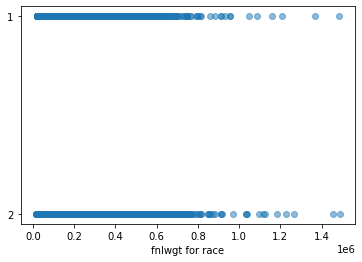

In [35]:
# show density maps between fnlwgt and gender
plt.xlabel('fnlwgt for race')
fnlwgt_num = np.array(df_num.select("fnlwgt").collect())
gender_num = np.array(df_num.select("gender_num").collect())
plt.scatter(x=fnlwgt_num[:,0], y=gender_num[:,0], alpha=0.5)
plt.show()

In [36]:
#New Function Tile_Objects()
#Tile objects to decline the number attribute
def Tile_Objects(itemName, train):
    tempdf = train
    items = np.array(tempdf.select(itemName).groupBy(itemName).count().collect())
    
    for item in items:
        line = expr("IF(" + itemName + " = '" + item[0] + "', 1, 0)")
        tempdf = tempdf.withColumn(item[0] + "_num", line)
        
    tempdf = tempdf.drop(itemName)
    tempdf = tempdf.drop(itemName + "_num")
    return tempdf

train = df_num
#Make a loop for tiling objects
for i in ['workclass', 'education', '`marital-status`', 'occupation', "relationship", "race", "gender"]:
    train = Tile_Objects(i, train)

In [37]:
train = train.drop("marital-status")
train = train.drop("marital-status_num")

In [38]:
train

DataFrame[age: int, fnlwgt: int, educational-num: int, hours-per-week: int, Self-emp-not-inc_num: int, Local-gov_num: int, State-gov_num: int, Private_num: int, Federal-gov_num: int, Self-emp-inc_num: int, Without-pay_num: int, Masters_num: int, 10th_num: int, 5th-6th_num: int, Assoc-acdm_num: int, Assoc-voc_num: int, 7th-8th_num: int, 9th_num: int, HS-grad_num: int, Bachelors_num: int, 11th_num: int, 1st-4th_num: int, Preschool_num: int, 12th_num: int, Doctorate_num: int, Some-college_num: int, Prof-school_num: int, Separated_num: int, Never-married_num: int, Married-spouse-absent_num: int, Divorced_num: int, Widowed_num: int, Married-AF-spouse_num: int, Married-civ-spouse_num: int, Sales_num: int, Exec-managerial_num: int, Prof-specialty_num: int, Handlers-cleaners_num: int, Farming-fishing_num: int, Craft-repair_num: int, Transport-moving_num: int, Priv-house-serv_num: int, Protective-serv_num: int, Other-service_num: int, Tech-support_num: int, Machine-op-inspct_num: int, Armed-For

In [39]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
assmebler = VectorAssembler(
    inputCols=train.columns,
    outputCol="features"
)
output = assmebler.transform(train)

In [40]:
from pyspark.ml.feature import MinMaxScaler


scaler = MinMaxScaler(inputCol= "features", outputCol="scaled_features")

# Compute summary statistics and generate MinMaxScalerModel
scalerModel = scaler.fit(output)

# rescale each feature to range [min, max].
scaledData = scalerModel.transform(output)

22/10/10 07:36:48 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [41]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator


# Trains a k-means model.
kmeans = KMeans(featuresCol="scaled_features").setK(10)
kmeans_model = kmeans.fit(scaledData)

# Make predictions
kmeans_predictions = kmeans_model.transform(scaledData)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

kmeans_silhouette = evaluator.evaluate(kmeans_predictions)
print("Silhouette with squared euclidean distance = " + str(kmeans_silhouette))

Silhouette with squared euclidean distance = -0.09437002119098928


In [42]:
kmeans_transformed = kmeans_model.transform(scaledData)

In [43]:
from pyspark.sql.functions import monotonically_increasing_id
df_num_index =  df_num.withColumn("columnindex", monotonically_increasing_id())
kmeans_transformed =  kmeans_transformed.withColumn("columnindex", monotonically_increasing_id())
kmeans_transformed_index = kmeans_transformed.select("columnindex","prediction")

kmeans_df_result = df_num_index.join(kmeans_transformed_index, on=["columnindex"]).drop("columnindex")
kmeans_df_result.show()

+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+--------------+-------------+-------------+------------------+--------------+----------------+--------+----------+----------+
|age|       workclass|fnlwgt|   education|educational-num|    marital-status|       occupation| relationship|              race|gender|hours-per-week|workclass_num|education_num|marital-status_num|occupation_num|relationship_num|race_num|gender_num|prediction|
+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+--------------+-------------+-------------+------------------+--------------+----------------+--------+----------+----------+
| 39|Self-emp-not-inc|327120|     HS-grad|              9|Married-civ-spouse|     Craft-repair|      Husband|             White|  Male|            40|            1|            8|                 7|             6|     

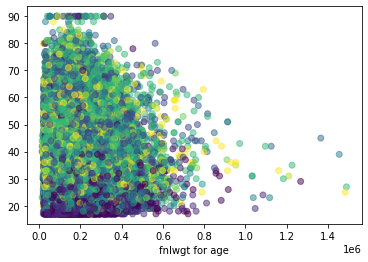

In [44]:
# show density maps between fnlwgt and workclass
plt.xlabel('fnlwgt for age')
kmeans_fnlwgt_num = np.array(kmeans_df_result.select("fnlwgt").collect())
kmeans_age_num = np.array(kmeans_df_result.select("age").collect())
kmeans_cluster = np.array(kmeans_df_result.select("prediction").collect())
plt.scatter(x=kmeans_fnlwgt_num[:,0], y=kmeans_age_num[:,0], c= kmeans_cluster[:,0], alpha=0.5)
plt.show()

In [45]:
from pyspark.ml.clustering import GaussianMixture

gmm = GaussianMixture().setK(10).setSeed(538009335)
gmm_model = gmm.fit(scaledData)

22/10/10 07:37:15 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
22/10/10 07:37:15 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK
22/10/10 07:37:15 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/10/10 07:37:15 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS
22/10/10 07:37:15 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/10/10 07:37:15 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


In [46]:
gmm_transformed = gmm_model.transform(scaledData)

In [47]:
from pyspark.sql.functions import monotonically_increasing_id
df_num_index =  df_num.withColumn("columnindex", monotonically_increasing_id())
gmm_transformed =  gmm_transformed.withColumn("columnindex", monotonically_increasing_id())
gmm_transformed_index = gmm_transformed.select("columnindex","prediction")

gmm_df_result = df_num_index.join(gmm_transformed_index, on=["columnindex"]).drop("columnindex")
gmm_df_result.show()

+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+--------------+-------------+-------------+------------------+--------------+----------------+--------+----------+----------+
|age|       workclass|fnlwgt|   education|educational-num|    marital-status|       occupation| relationship|              race|gender|hours-per-week|workclass_num|education_num|marital-status_num|occupation_num|relationship_num|race_num|gender_num|prediction|
+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+--------------+-------------+-------------+------------------+--------------+----------------+--------+----------+----------+
| 39|Self-emp-not-inc|327120|     HS-grad|              9|Married-civ-spouse|     Craft-repair|      Husband|             White|  Male|            40|            1|            8|                 7|             6|     

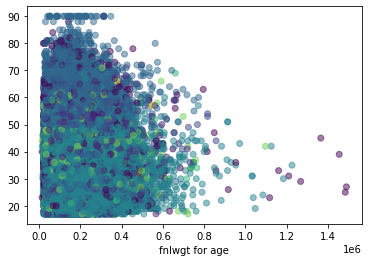

In [48]:
# show density maps between fnlwgt and workclass
plt.xlabel('fnlwgt for age')
gmm_fnlwgt_num = np.array(gmm_df_result.select("fnlwgt").collect())
gmm_age_num = np.array(gmm_df_result.select("age").collect())
gmm_cluster = np.array(gmm_df_result.select("prediction").collect())
plt.scatter(x=gmm_fnlwgt_num[:,0], y=gmm_age_num[:,0], c= gmm_cluster[:,0], alpha=0.5)
plt.show()

In [49]:
gmm_df_result.select("prediction").groupBy("prediction").count().collect()

[Row(prediction=1, count=2655),
 Row(prediction=6, count=417),
 Row(prediction=3, count=6778),
 Row(prediction=9, count=115),
 Row(prediction=4, count=23988),
 Row(prediction=8, count=2),
 Row(prediction=7, count=2418),
 Row(prediction=2, count=3925),
 Row(prediction=0, count=2052)]

In [50]:
#Get different clusters by kmeans result
kmeans_cluster01 = kmeans_df_result.filter(kmeans_df_result.prediction == 0)
kmeans_cluster02 = kmeans_df_result.filter(kmeans_df_result.prediction == 1)
kmeans_cluster03 = kmeans_df_result.filter(kmeans_df_result.prediction == 2)
kmeans_cluster04 = kmeans_df_result.filter(kmeans_df_result.prediction == 3)
kmeans_cluster05 = kmeans_df_result.filter(kmeans_df_result.prediction == 4)
kmeans_cluster06 = kmeans_df_result.filter(kmeans_df_result.prediction == 5)
kmeans_cluster07 = kmeans_df_result.filter(kmeans_df_result.prediction == 6)
kmeans_cluster08 = kmeans_df_result.filter(kmeans_df_result.prediction == 7)
kmeans_cluster09 = kmeans_df_result.filter(kmeans_df_result.prediction == 8)
kmeans_cluster10 = kmeans_df_result.filter(kmeans_df_result.prediction == 9)

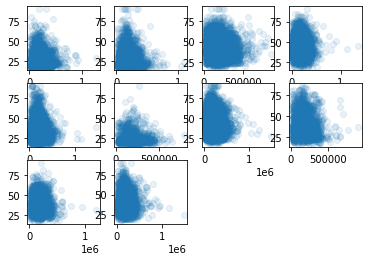

In [51]:
#fnlwgt for age in K-means clusters
plt.subplot(3,4,1)
kmeans_cluster01_age = np.array(kmeans_cluster01.select("fnlwgt","age").collect())
plt.scatter(x=kmeans_cluster01_age[:,0], y=kmeans_cluster01_age[:,1], alpha=0.1)
plt.subplot(3,4,2)
kmeans_cluster02_age = np.array(kmeans_cluster02.select("fnlwgt","age").collect())
plt.scatter(x=kmeans_cluster02_age[:,0], y=kmeans_cluster02_age[:,1], alpha=0.1)
plt.subplot(3,4,3)
kmeans_cluster03_age = np.array(kmeans_cluster03.select("fnlwgt","age").collect())
plt.scatter(x=kmeans_cluster03_age[:,0], y=kmeans_cluster03_age[:,1], alpha=0.1)
plt.subplot(3,4,4)
kmeans_cluster04_age = np.array(kmeans_cluster04.select("fnlwgt","age").collect())
plt.scatter(x=kmeans_cluster04_age[:,0], y=kmeans_cluster04_age[:,1], alpha=0.1)
plt.subplot(3,4,5)
kmeans_cluster05_age = np.array(kmeans_cluster05.select("fnlwgt","age").collect())
plt.scatter(x=kmeans_cluster05_age[:,0], y=kmeans_cluster05_age[:,1], alpha=0.1)
plt.subplot(3,4,6)
kmeans_cluster06_age = np.array(kmeans_cluster06.select("fnlwgt","age").collect())
plt.scatter(x=kmeans_cluster06_age[:,0], y=kmeans_cluster06_age[:,1], alpha=0.1)
plt.subplot(3,4,7)
kmeans_cluster07_age = np.array(kmeans_cluster07.select("fnlwgt","age").collect())
plt.scatter(x=kmeans_cluster07_age[:,0], y=kmeans_cluster07_age[:,1], alpha=0.1)
plt.subplot(3,4,8)
kmeans_cluster08_age = np.array(kmeans_cluster08.select("fnlwgt","age").collect())
plt.scatter(x=kmeans_cluster08_age[:,0], y=kmeans_cluster08_age[:,1], alpha=0.1)
plt.subplot(3,4,9)
kmeans_cluster09_age = np.array(kmeans_cluster09.select("fnlwgt","age").collect())
plt.scatter(x=kmeans_cluster09_age[:,0], y=kmeans_cluster09_age[:,1], alpha=0.1)
plt.subplot(3,4,10)
kmeans_cluster10_age = np.array(kmeans_cluster10.select("fnlwgt","age").collect())
plt.scatter(x=kmeans_cluster10_age[:,0], y=kmeans_cluster10_age[:,1], alpha=0.1)
plt.show()

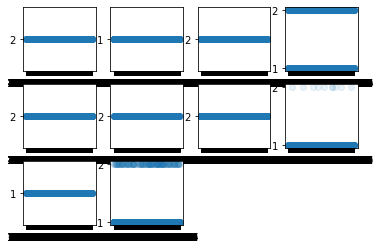

In [52]:
#fnlwgt for gender in K-means clusters
plt.subplot(3,4,1)
kmeans_cluster01_gender = np.array(kmeans_cluster01.select("fnlwgt","gender_num").collect())
plt.scatter(x=kmeans_cluster01_gender[:,0], y=kmeans_cluster01_gender[:,1], alpha=0.1)
plt.subplot(3,4,2)
kmeans_cluster02_gender = np.array(kmeans_cluster02.select("fnlwgt","gender_num").collect())
plt.scatter(x=kmeans_cluster02_gender[:,0], y=kmeans_cluster02_gender[:,1], alpha=0.1)
plt.subplot(3,4,3)
kmeans_cluster03_gender = np.array(kmeans_cluster03.select("fnlwgt","gender_num").collect())
plt.scatter(x=kmeans_cluster03_gender[:,0], y=kmeans_cluster03_gender[:,1], alpha=0.1)
plt.subplot(3,4,4)
kmeans_cluster04_gender = np.array(kmeans_cluster04.select("fnlwgt","gender_num").collect())
plt.scatter(x=kmeans_cluster04_gender[:,0], y=kmeans_cluster04_gender[:,1], alpha=0.1)
plt.subplot(3,4,5)
kmeans_cluster05_gender = np.array(kmeans_cluster05.select("fnlwgt","gender_num").collect())
plt.scatter(x=kmeans_cluster05_gender[:,0], y=kmeans_cluster05_gender[:,1], alpha=0.1)
plt.subplot(3,4,6)
kmeans_cluster06_gender = np.array(kmeans_cluster06.select("fnlwgt","gender_num").collect())
plt.scatter(x=kmeans_cluster06_gender[:,0], y=kmeans_cluster06_gender[:,1], alpha=0.1)
plt.subplot(3,4,7)
kmeans_cluster07_gender = np.array(kmeans_cluster07.select("fnlwgt","gender_num").collect())
plt.scatter(x=kmeans_cluster07_gender[:,0], y=kmeans_cluster07_gender[:,1], alpha=0.1)
plt.subplot(3,4,8)
kmeans_cluster08_gender = np.array(kmeans_cluster08.select("fnlwgt","gender_num").collect())
plt.scatter(x=kmeans_cluster08_gender[:,0], y=kmeans_cluster08_gender[:,1], alpha=0.1)
plt.subplot(3,4,9)
kmeans_cluster09_gender = np.array(kmeans_cluster09.select("fnlwgt","gender_num").collect())
plt.scatter(x=kmeans_cluster09_gender[:,0], y=kmeans_cluster09_gender[:,1], alpha=0.1)
plt.subplot(3,4,10)
kmeans_cluster10_gender = np.array(kmeans_cluster10.select("fnlwgt","gender_num").collect())
plt.scatter(x=kmeans_cluster10_gender[:,0], y=kmeans_cluster10_gender[:,1], alpha=0.1)
plt.show()

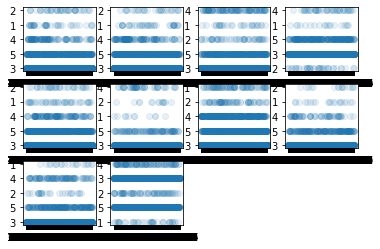

In [53]:
#fnlwgt for race in K-means clusters
plt.subplot(3,4,1)
kmeans_cluster01_race = np.array(kmeans_cluster01.select("fnlwgt","race_num").collect())
plt.scatter(x=kmeans_cluster01_race[:,0], y=kmeans_cluster01_race[:,1], alpha=0.1)
plt.subplot(3,4,2)
kmeans_cluster02_race = np.array(kmeans_cluster02.select("fnlwgt","race_num").collect())
plt.scatter(x=kmeans_cluster02_race[:,0], y=kmeans_cluster02_race[:,1], alpha=0.1)
plt.subplot(3,4,3)
kmeans_cluster03_race = np.array(kmeans_cluster03.select("fnlwgt","race_num").collect())
plt.scatter(x=kmeans_cluster03_race[:,0], y=kmeans_cluster03_race[:,1], alpha=0.1)
plt.subplot(3,4,4)
kmeans_cluster04_race = np.array(kmeans_cluster04.select("fnlwgt","race_num").collect())
plt.scatter(x=kmeans_cluster04_race[:,0], y=kmeans_cluster04_race[:,1], alpha=0.1)
plt.subplot(3,4,5)
kmeans_cluster05_race = np.array(kmeans_cluster05.select("fnlwgt","race_num").collect())
plt.scatter(x=kmeans_cluster05_race[:,0], y=kmeans_cluster05_race[:,1], alpha=0.1)
plt.subplot(3,4,6)
kmeans_cluster06_race = np.array(kmeans_cluster06.select("fnlwgt","race_num").collect())
plt.scatter(x=kmeans_cluster06_race[:,0], y=kmeans_cluster06_race[:,1], alpha=0.1)
plt.subplot(3,4,7)
kmeans_cluster07_race = np.array(kmeans_cluster07.select("fnlwgt","race_num").collect())
plt.scatter(x=kmeans_cluster07_race[:,0], y=kmeans_cluster07_race[:,1], alpha=0.1)
plt.subplot(3,4,8)
kmeans_cluster08_race = np.array(kmeans_cluster08.select("fnlwgt","race_num").collect())
plt.scatter(x=kmeans_cluster08_race[:,0], y=kmeans_cluster08_race[:,1], alpha=0.1)
plt.subplot(3,4,9)
kmeans_cluster09_race = np.array(kmeans_cluster09.select("fnlwgt","race_num").collect())
plt.scatter(x=kmeans_cluster09_race[:,0], y=kmeans_cluster09_race[:,1], alpha=0.1)
plt.subplot(3,4,10)
kmeans_cluster10_race = np.array(kmeans_cluster10.select("fnlwgt","race_num").collect())
plt.scatter(x=kmeans_cluster10_race[:,0], y=kmeans_cluster10_race[:,1], alpha=0.1)
plt.show()

In [54]:
#Get different clusters by gmm result
gmm_cluster01 = gmm_df_result.filter(gmm_df_result.prediction == 0)
gmm_cluster02 = gmm_df_result.filter(gmm_df_result.prediction == 1)
gmm_cluster03 = gmm_df_result.filter(gmm_df_result.prediction == 2)
gmm_cluster04 = gmm_df_result.filter(gmm_df_result.prediction == 3)
gmm_cluster05 = gmm_df_result.filter(gmm_df_result.prediction == 4)
#gmm_cluster06 = gmm_df_result.filter(gmm_df_result.prediction == 5)
gmm_cluster07 = gmm_df_result.filter(gmm_df_result.prediction == 6)
gmm_cluster08 = gmm_df_result.filter(gmm_df_result.prediction == 7)
gmm_cluster09 = gmm_df_result.filter(gmm_df_result.prediction == 8)
gmm_cluster10 = gmm_df_result.filter(gmm_df_result.prediction == 9)

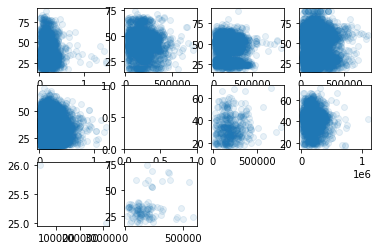

In [55]:
#fnlwgt for age in GMM clusters
plt.subplot(3,4,1)
gmm_cluster01_age = np.array(gmm_cluster01.select("fnlwgt","age").collect())
plt.scatter(x=gmm_cluster01_age[:,0], y=gmm_cluster01_age[:,1], alpha=0.1)
plt.subplot(3,4,2)
gmm_cluster02_age = np.array(gmm_cluster02.select("fnlwgt","age").collect())
plt.scatter(x=gmm_cluster02_age[:,0], y=gmm_cluster02_age[:,1], alpha=0.1)
plt.subplot(3,4,3)
gmm_cluster03_age = np.array(gmm_cluster03.select("fnlwgt","age").collect())
plt.scatter(x=gmm_cluster03_age[:,0], y=gmm_cluster03_age[:,1], alpha=0.1)
plt.subplot(3,4,4)
gmm_cluster04_age = np.array(gmm_cluster04.select("fnlwgt","age").collect())
plt.scatter(x=gmm_cluster04_age[:,0], y=gmm_cluster04_age[:,1], alpha=0.1)
plt.subplot(3,4,5)
gmm_cluster05_age = np.array(gmm_cluster05.select("fnlwgt","age").collect())
plt.scatter(x=gmm_cluster05_age[:,0], y=gmm_cluster05_age[:,1], alpha=0.1)
plt.subplot(3,4,6)
#gmm_cluster06_age = np.array(gmm_cluster06.select("fnlwgt","age").collect())
#plt.scatter(x=gmm_cluster06_age[:,0], y=gmm_cluster06_age[:,1], alpha=0.1)
plt.subplot(3,4,7)
gmm_cluster07_age = np.array(gmm_cluster07.select("fnlwgt","age").collect())
plt.scatter(x=gmm_cluster07_age[:,0], y=gmm_cluster07_age[:,1], alpha=0.1)
plt.subplot(3,4,8)
gmm_cluster08_age = np.array(gmm_cluster08.select("fnlwgt","age").collect())
plt.scatter(x=gmm_cluster08_age[:,0], y=gmm_cluster08_age[:,1], alpha=0.1)
plt.subplot(3,4,9)
gmm_cluster09_age = np.array(gmm_cluster09.select("fnlwgt","age").collect())
plt.scatter(x=gmm_cluster09_age[:,0], y=gmm_cluster09_age[:,1], alpha=0.1)
plt.subplot(3,4,10)
gmm_cluster10_age = np.array(gmm_cluster10.select("fnlwgt","age").collect())
plt.scatter(x=gmm_cluster10_age[:,0], y=gmm_cluster10_age[:,1], alpha=0.1)
plt.show()

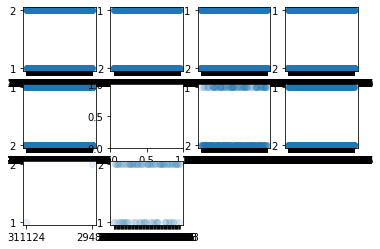

In [56]:
#fnlwgt for gender in GMM clusters
plt.subplot(3,4,1)
gmm_cluster01_gender = np.array(gmm_cluster01.select("fnlwgt","gender_num").collect())
plt.scatter(x=gmm_cluster01_gender[:,0], y=gmm_cluster01_gender[:,1], alpha=0.1)
plt.subplot(3,4,2)
gmm_cluster02_gender = np.array(gmm_cluster02.select("fnlwgt","gender_num").collect())
plt.scatter(x=gmm_cluster02_gender[:,0], y=gmm_cluster02_gender[:,1], alpha=0.1)
plt.subplot(3,4,3)
gmm_cluster03_gender = np.array(gmm_cluster03.select("fnlwgt","gender_num").collect())
plt.scatter(x=gmm_cluster03_gender[:,0], y=gmm_cluster03_gender[:,1], alpha=0.1)
plt.subplot(3,4,4)
gmm_cluster04_gender = np.array(gmm_cluster04.select("fnlwgt","gender_num").collect())
plt.scatter(x=gmm_cluster04_gender[:,0], y=gmm_cluster04_gender[:,1], alpha=0.1)
plt.subplot(3,4,5)
gmm_cluster05_gender = np.array(gmm_cluster05.select("fnlwgt","gender_num").collect())
plt.scatter(x=gmm_cluster05_gender[:,0], y=gmm_cluster05_gender[:,1], alpha=0.1)
plt.subplot(3,4,6)
#gmm_cluster06_gender = np.array(gmm_cluster06.select("fnlwgt","gender_num").collect())
#plt.scatter(x=gmm_cluster06_gender[:,0], y=gmm_cluster06_gender[:,1], alpha=0.1)
plt.subplot(3,4,7)
gmm_cluster07_gender = np.array(gmm_cluster07.select("fnlwgt","gender_num").collect())
plt.scatter(x=gmm_cluster07_gender[:,0], y=gmm_cluster07_gender[:,1], alpha=0.1)
plt.subplot(3,4,8)
gmm_cluster08_gender = np.array(gmm_cluster08.select("fnlwgt","gender_num").collect())
plt.scatter(x=gmm_cluster08_gender[:,0], y=gmm_cluster08_gender[:,1], alpha=0.1)
plt.subplot(3,4,9)
gmm_cluster09_gender = np.array(gmm_cluster09.select("fnlwgt","gender_num").collect())
plt.scatter(x=gmm_cluster09_gender[:,0], y=gmm_cluster09_gender[:,1], alpha=0.1)
plt.subplot(3,4,10)
gmm_cluster10_gender = np.array(gmm_cluster10.select("fnlwgt","gender_num").collect())
plt.scatter(x=gmm_cluster10_gender[:,0], y=gmm_cluster10_gender[:,1], alpha=0.1)
plt.show()

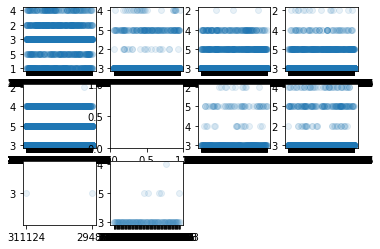

In [57]:
#fnlwgt for race in GMM clusters
plt.subplot(3,4,1)
gmm_cluster01_race = np.array(gmm_cluster01.select("fnlwgt","race_num").collect())
plt.scatter(x=gmm_cluster01_race[:,0], y=gmm_cluster01_race[:,1], alpha=0.1)
plt.subplot(3,4,2)
gmm_cluster02_race = np.array(gmm_cluster02.select("fnlwgt","race_num").collect())
plt.scatter(x=gmm_cluster02_race[:,0], y=gmm_cluster02_race[:,1], alpha=0.1)
plt.subplot(3,4,3)
gmm_cluster03_race = np.array(gmm_cluster03.select("fnlwgt","race_num").collect())
plt.scatter(x=gmm_cluster03_race[:,0], y=gmm_cluster03_race[:,1], alpha=0.1)
plt.subplot(3,4,4)
gmm_cluster04_race = np.array(gmm_cluster04.select("fnlwgt","race_num").collect())
plt.scatter(x=gmm_cluster04_race[:,0], y=gmm_cluster04_race[:,1], alpha=0.1)
plt.subplot(3,4,5)
gmm_cluster05_race = np.array(gmm_cluster05.select("fnlwgt","race_num").collect())
plt.scatter(x=gmm_cluster05_race[:,0], y=gmm_cluster05_race[:,1], alpha=0.1)
plt.subplot(3,4,6)
#gmm_cluster06_race = np.array(gmm_cluster06.select("fnlwgt","race_num").collect())
#plt.scatter(x=gmm_cluster06_race[:,0], y=gmm_cluster06_race[:,1], alpha=0.1)
plt.subplot(3,4,7)
gmm_cluster07_race = np.array(gmm_cluster07.select("fnlwgt","race_num").collect())
plt.scatter(x=gmm_cluster07_race[:,0], y=gmm_cluster07_race[:,1], alpha=0.1)
plt.subplot(3,4,8)
gmm_cluster08_race = np.array(gmm_cluster08.select("fnlwgt","race_num").collect())
plt.scatter(x=gmm_cluster08_race[:,0], y=gmm_cluster08_race[:,1], alpha=0.1)
plt.subplot(3,4,9)
gmm_cluster09_race = np.array(gmm_cluster09.select("fnlwgt","race_num").collect())
plt.scatter(x=gmm_cluster09_race[:,0], y=gmm_cluster09_race[:,1], alpha=0.1)
plt.subplot(3,4,10)
gmm_cluster10_race = np.array(gmm_cluster10.select("fnlwgt","race_num").collect())
plt.scatter(x=gmm_cluster10_race[:,0], y=gmm_cluster10_race[:,1], alpha=0.1)
plt.show()